In [1]:
import pandas as pd

In [2]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

In [3]:
df = pd.DataFrame(raw_data, columns = raw_data.keys())
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [4]:
#1. What is the mean preTestScore from the regiment Nighthawks?

In [5]:
#masking, #groupby

In [6]:
#agg: mean, preTestScore, regiment

In [10]:
#masking
df[df['regiment']=='Nighthawks']['preTestScore'].mean()

15.25

In [16]:
#groupby
df.groupby('regiment').mean().loc['Nighthawks','preTestScore']

15.25

In [19]:
df.groupby(by='regiment')['preTestScore'].mean()['Nighthawks']


15.25

In [23]:
a = df.groupby('regiment')
a.get_group('Nighthawks')['preTestScore'].mean()


15.25

In [24]:
#2. Present the mean preTestScores grouped by regiment and company

In [26]:
df.groupby(by=['regiment','company'])['preTestScore'].mean()

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

In [ ]:
# aggfunc={mean:pretestscore},values= pretestscore, columns= regiment and company, index: regiment and company

In [27]:
df1 = pd.pivot_table(df,index=['regiment','company'],values='preTestScore',aggfunc='mean')
df1


preTestScore
regiment   company              
Dragoons   1st               3.5
           2nd              27.5
Nighthawks 1st              14.0
           2nd              16.5
Scouts     1st               2.5
           2nd               2.5

In [32]:
df.pivot_table(index = 'regiment',columns=['company'],values='preTestScore',aggfunc='mean')

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5


In [33]:
#pivot : unmelting, #pivot_table: creating a new df according to the requirements

In [ ]:
#3. Present the mean preTestScores grouped by regiment and company and show the output without the hierarchical indexing

In [36]:
df.groupby(by=['regiment','company'])['preTestScore'].mean()

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

In [35]:
df.groupby(by=['regiment','company'])['preTestScore'].mean().unstack()

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5


In [37]:
df.groupby(by=['regiment','company'])['preTestScore'].mean().unstack().stack()

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
dtype: float64

In [38]:
#4. Discover the ratio of 1st companies per regiment and sort it from the most to the least

In [39]:
#total 1st companies/total number of companies in that regiment

In [41]:
#count(), sum()

In [44]:
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [57]:
df.groupby('regiment')['company'].value_counts().unstack()["1st"]/df.groupby('regiment')['company'].count()*100

regiment
Dragoons      50.0
Nighthawks    50.0
Scouts        50.0
dtype: float64

In [55]:
#ratio of 1st company for each regiment

regiment
Dragoons      4
Nighthawks    4
Scouts        4
Name: company, dtype: int64

In [60]:
df.groupby('regiment').count()['company']

regiment
Dragoons      4
Nighthawks    4
Scouts        4
Name: company, dtype: int64

In [59]:
# ratio of 1st company in every regiment: number of 1st company in dragoons/ total number of companies in dragoons

In [65]:
df.groupby('regiment')['company'].value_counts().unstack()['1st']

regiment
Dragoons      2
Nighthawks    2
Scouts        2
Name: 1st, dtype: int64

In [67]:
a = df.groupby('regiment')['company'].value_counts().unstack()['1st']/df.groupby('regiment').count()['company']

In [68]:
a.sort_values()

regiment
Dragoons      0.5
Nighthawks    0.5
Scouts        0.5
dtype: float64

In [69]:
data1=pd.read_csv('train.csv')
data2=pd.read_csv('test.csv')

In [70]:
data_01=pd.concat([data1,data2],axis=0,sort=False,join='inner')  #Concatenation joins DataFrames basically either by rows or colums(axis=0 or 1).
data_01

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [71]:
# Write a code to show how much is the kurtosis in Age column for data_01.

In [72]:
# Write a code to show how much do the fare is skewed in data_01.

In [73]:
#kurt(), skew()

In [74]:
data_01['Age'].kurt()

0.1469476357378139

In [75]:
data_01['Fare'].skew()


4.367709134122922

In [76]:
import matplotlib.pyplot as plt

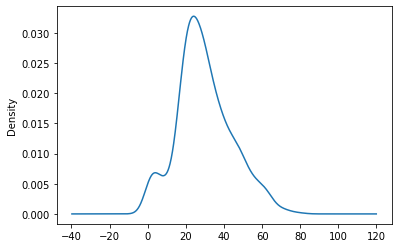

In [81]:
data_01['Age'].plot(kind = 'kde')

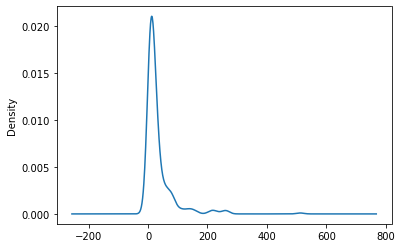

In [79]:
data_01.Fare.plot(kind = 'kde')

In [80]:
data_01.Fare.kurt()

27.027986349442294

In [ ]:
# Write a code to show the count of male and female in ship using bar plot where color is green

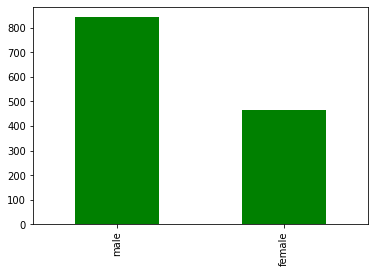

In [89]:
data_01['Sex'].value_counts().plot(kind = 'bar', color='green')
plt.show()

In [85]:
data_01['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

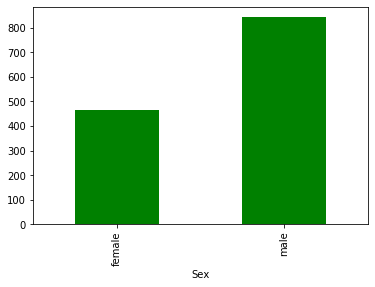

In [94]:
a=data_01.groupby(by='Sex')['Name'].count()
a.plot(kind='bar',color='green')
plt.show()

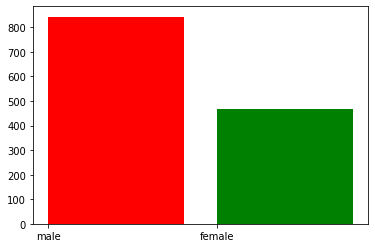

In [98]:
plt.bar(x='male',height=data_01[data_01['Sex']=='male']['Sex'].count(),color='r',align='edge')
plt.bar(x='female',height=data_01[data_01['Sex']=='female']['Sex'].count(),color='g',align='edge')
plt.show()

In [99]:
# Write a code to show the age distribution of passengers in a ship using histogram plot for titanic dataset 
# where title - 'histogram for age distribution', color is blue, bin size is 20

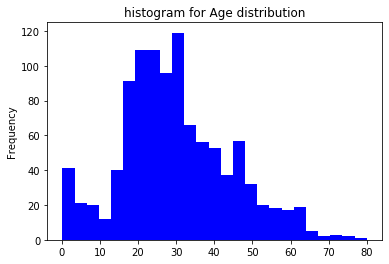

In [109]:
data_01.Age.plot(kind='hist',title='histogram for Age distribution', color='b',bins=25)
plt.show()

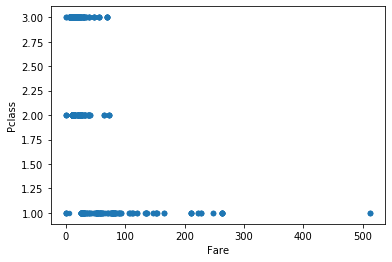

In [110]:
data_01.plot.scatter(x='Fare', y='Pclass')

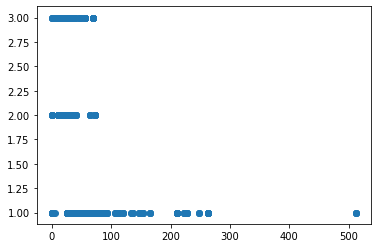

In [114]:
plt.scatter(x=data_01['Fare'], y=data_01['Pclass'])

In [128]:
df.groupby(by='regiment')['company'].value_counts().unstack()['1st']/df.groupby(by='regiment')['company'].count()



regiment
Dragoons      0.5
Nighthawks    0.5
Scouts        0.5
dtype: float64

In [127]:
df.groupby(by='regiment')['company'].count()

regiment
Dragoons      4
Nighthawks    4
Scouts        4
Name: company, dtype: int64

In [122]:
df.groupby(by='regiment')['company'].

12

In [118]:
df.groupby(by='regiment')['company'].value_counts().unstack()

company,1st,2nd
regiment,,
Dragoons,2,2
Nighthawks,2,2
Scouts,2,2
